In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the Dataset:**

In [93]:
df = pd.read_csv('abalone.csv')

**Viewing the Dataset:**

In [94]:
df.head()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

**Generating Label 'Age'**

In [95]:
df['Age'] = df['Shell weight'] + 1.5

**Descriptive Statistics:**

In [96]:
df.describe()

Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings          Age  
count     4177.000000   4177.000000  4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684     1.738831  
std          0.109614      0.139203     3.224169     0.139203  
min          0.000500      0.001500     1.000000     1.501500  
25%          0.093500      0.130000     8.000000     1.630000  
50%          0.171000      0.234000     9.000000     1.734000  
75%          0.253000      0.329000    11.000000     1.829000  
max          0.760000      1.005000    29.000000     2.505000

**Univariate Analysis:**

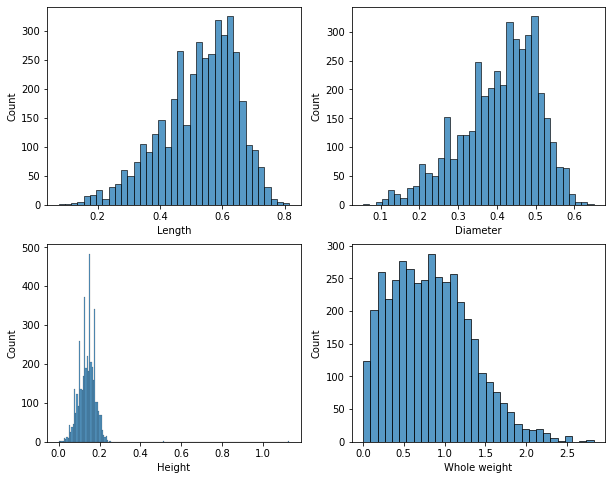

In [97]:
fig = plt.figure(figsize=(10,8))
for ind,col in enumerate(['Length','Diameter','Height','Whole weight']):
  ax = fig.add_subplot(2,2,ind+1)
  sns.histplot(data=df,x=col,ax=ax)

**Finding Correleation:**

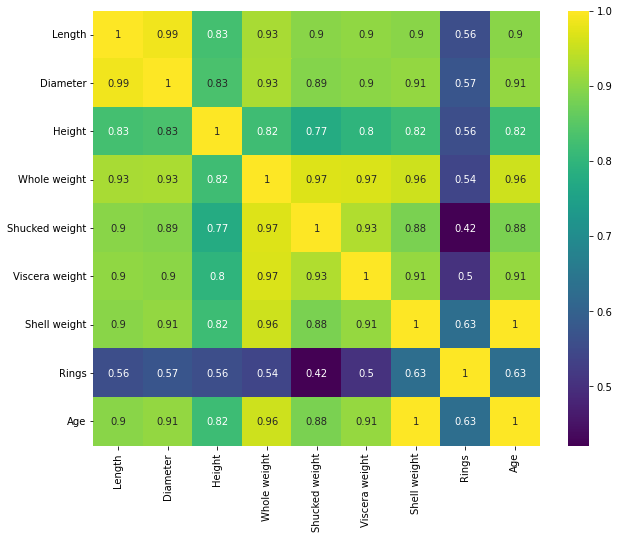

In [98]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

**Bi-Variate Analysis:**

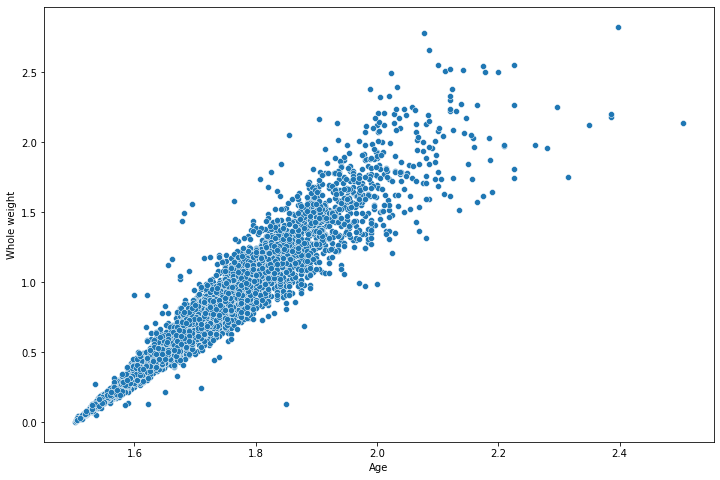

In [100]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x='Age',y='Whole weight')

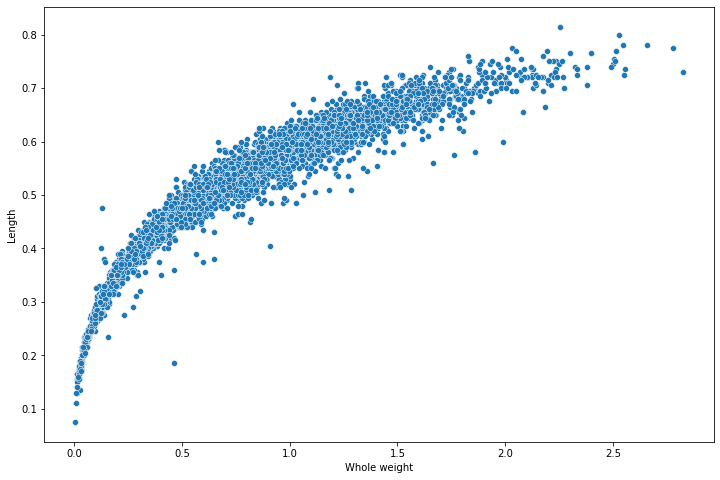

In [101]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x='Whole weight',y='Length')

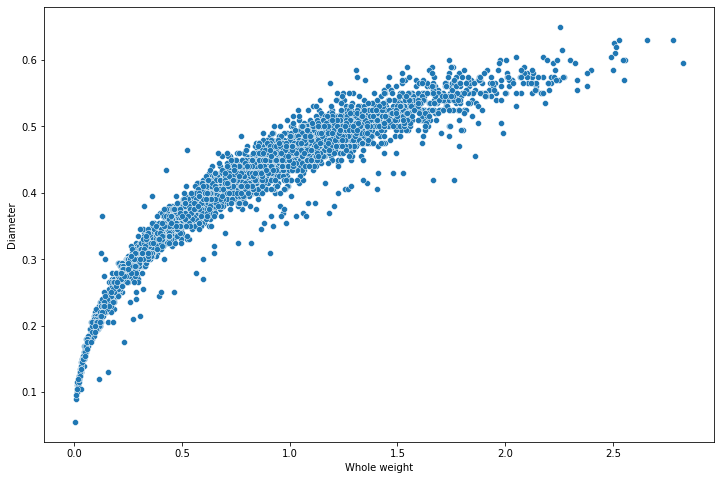

In [102]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x='Whole weight',y='Diameter')

**Multi-Variate Analysis:**

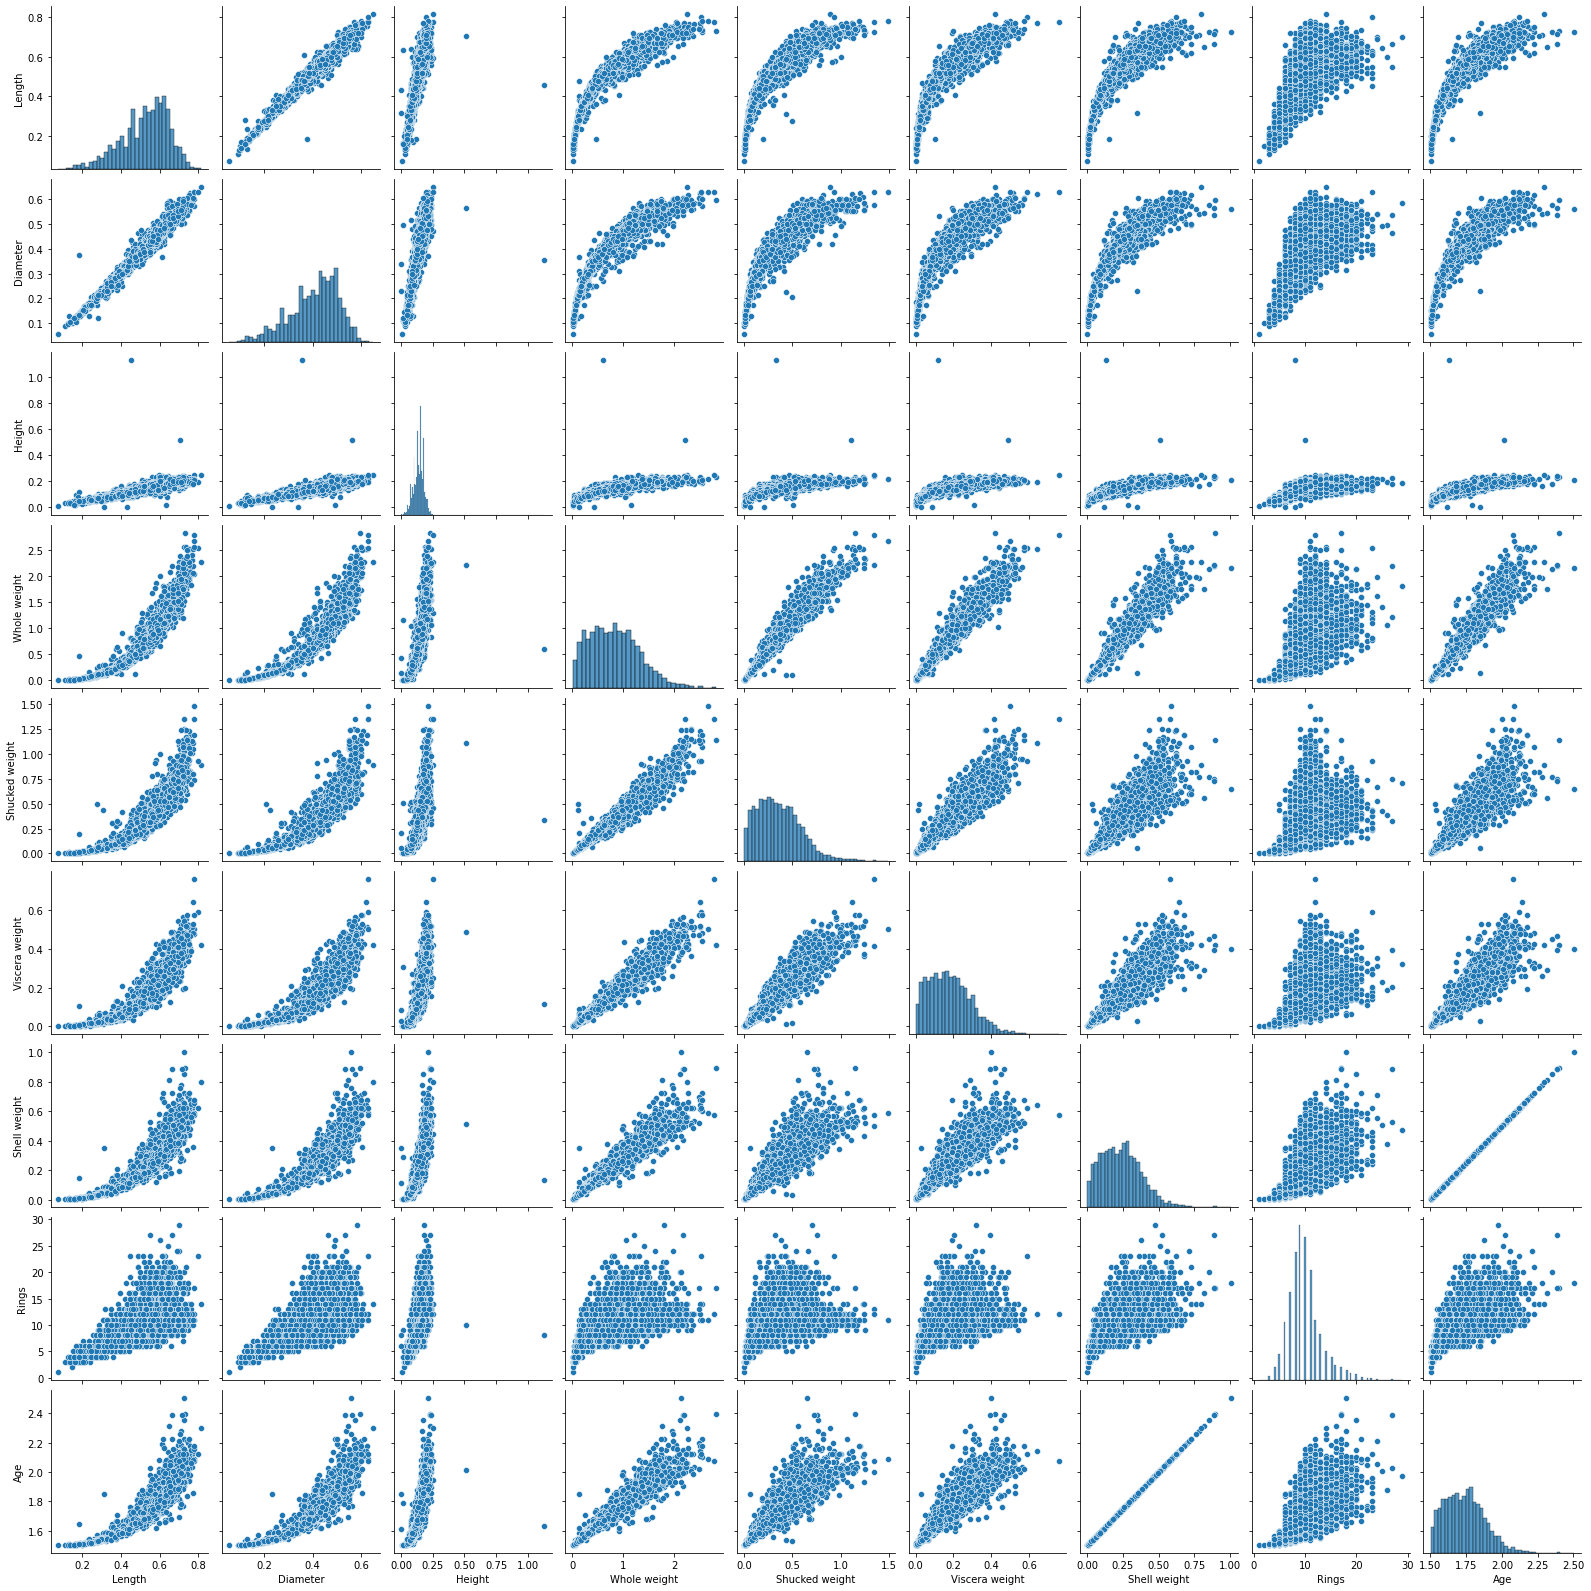

In [103]:
sns.pairplot(data=df)

**Missing Value Detection:**

In [104]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
Age               0
dtype: int64

**Outliers Detection:**

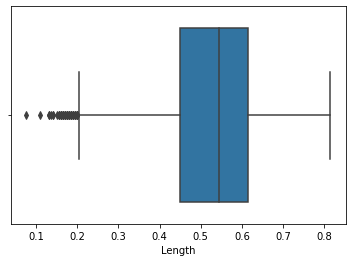

In [105]:
sns.boxplot(data=df,x='Length')

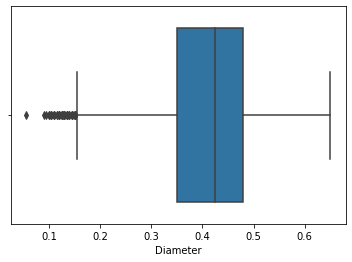

In [106]:
sns.boxplot(data=df,x='Diameter')

In [107]:
df[(df['Diameter']==df['Diameter'].min()) & (df['Length'] < 0.1)]

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
236   I   0.075     0.055    0.01         0.002           0.001   

     Viscera weight  Shell weight  Rings     Age  
236          0.0005        0.0015      1  1.5015

In [108]:
df = df.drop(index=236)

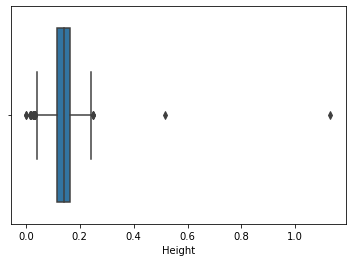

In [109]:
sns.boxplot(data=df,x='Height')

In [110]:
df = df.drop(index=df[df['Height'] > 0.5].index)

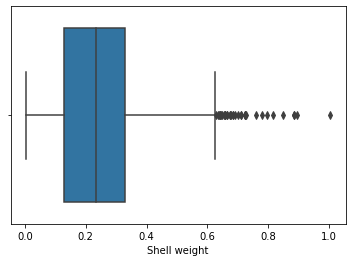

In [111]:
sns.boxplot(data=df,x='Shell weight')

In [112]:
df = df.drop(df[df['Shell weight'] > 0.9].index)

**Categorical Encoding:**

In [113]:
enc_sex = pd.get_dummies(df['Sex'])

In [114]:
 df = pd.concat([df.drop('Sex',axis=1),enc_sex],axis=1)

**Splitting the dataset into training and test set:**

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
X = df.drop('Age',axis=1)
y = df['Age']

In [117]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=101)

**Scaling the Dataset:**

In [118]:
from sklearn.preprocessing import MinMaxScaler

In [119]:
scaler = MinMaxScaler()

In [120]:
scaled_x_train = scaler.fit_transform(X_train)

In [121]:
scaled_x_test = scaler.transform(X_test)

**Model Building:**

In [122]:
from sklearn.linear_model import LinearRegression

In [123]:
model = LinearRegression()

In [124]:
model.fit(scaled_x_train,y_train)

LinearRegression()

In [126]:
prediction = model.predict(scaled_x_test)

**Model Evaluation:**

In [127]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [128]:
mean_absolute_error(y_test,prediction)

1.863132891899688e-16

In [129]:
df['Age'].mean()

1.7386639108554995

In [134]:
np.sqrt(mean_squared_error(y_test,prediction))

2.419918940304902e-16

In [135]:
df['Age'].std()

0.13864048404815985